In [27]:
import numpy as np
import pandas as pd
import os
from nltk import word_tokenize, pos_tag

from nltk import RegexpParser
from nltk.draw.tree import TreeView
from IPython.display import Image

from nltk.chunk import conlltags2tree, tree2conlltags, ne_chunk
from pprint import pprint

In [11]:
!pip install svgling

  Obtaining dependency information for svgling from https://files.pythonhosted.org/packages/01/af/473c8551a3d03d3b0fbe65cd8608c9aab930552adcb8ee90963dfc92ded6/svgling-0.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.1 MB/s eta 0:00:00


In [12]:
import svgling

In [14]:
df = pd.read_csv("/kaggle/input/nlp-telegram-locations-extractions/ru_geo_dataset.csv")

In [15]:
df.head()

,text,loc_markers,org_markers,per_markers,doc_id,sent_id
0,Вице-премьер по социальным вопросам Татьяна Го...,"[(82, 88)]","[(149, 160)]","[(36, 52)]",0,0
1,"По словам Голиковой, чаще всего онкологические...","[(89, 98), (100, 108), (110, 118), (121, 139),...",[],"[(10, 19)]",0,1
2,"Вице-премьер напомнила, что главные факторы см...","[(57, 63)]",[],[],0,2
3,"В начале года стало известно, что смертность о...",[],[],[],0,3
4,"По данным Росстата, в 2017 году от рака умерли...",[],"[(10, 18)]",[],0,4


In [18]:
ex = df.iloc[0]["text"]

In [19]:
sent = pos_tag(word_tokenize(ex))
sent

[('Вице-премьер', 'JJ'),
 ('по', 'NNP'),
 ('социальным', 'NNP'),
 ('вопросам', 'NNP'),
 ('Татьяна', 'NNP'),
 ('Голикова', 'NNP'),
 ('рассказала', 'NNP'),
 (',', ','),
 ('в', 'NNP'),
 ('каких', 'NNP'),
 ('регионах', 'NNP'),
 ('России', 'NNP'),
 ('зафиксирована', 'NNP'),
 ('наиболее', 'NNP'),
 ('высокая', 'NNP'),
 ('смертность', 'NNP'),
 ('от', 'NNP'),
 ('рака', 'NNP'),
 (',', ','),
 ('сообщает', 'NNP'),
 ('РИА', 'NNP'),
 ('Новости', 'NNP'),
 ('.', '.')]

After Chunking (S
  Вице-премьер/JJ
  (mychunk
    по/NNP
    социальным/NNP
    вопросам/NNP
    Татьяна/NNP
    Голикова/NNP
    рассказала/NNP)
  ,/,
  (mychunk
    в/NNP
    каких/NNP
    регионах/NNP
    России/NNP
    зафиксирована/NNP
    наиболее/NNP
    высокая/NNP
    смертность/NNP
    от/NNP
    рака/NNP)
  ,/,
  (mychunk сообщает/NNP РИА/NNP Новости/NNP)
  ./.)


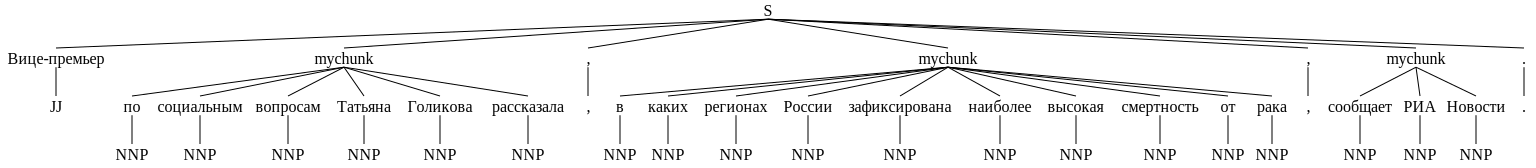

In [20]:
patterns= """mychunk:{<NN.*>+}"""
chunker = RegexpParser(patterns)
output = chunker.parse(sent)
print("After Chunking",output)
svgling.draw_tree(output)

In [21]:
iob_tagged = tree2conlltags(output)
iob_tagged

[('Вице-премьер', 'JJ', 'O'),
 ('по', 'NNP', 'B-mychunk'),
 ('социальным', 'NNP', 'I-mychunk'),
 ('вопросам', 'NNP', 'I-mychunk'),
 ('Татьяна', 'NNP', 'I-mychunk'),
 ('Голикова', 'NNP', 'I-mychunk'),
 ('рассказала', 'NNP', 'I-mychunk'),
 (',', ',', 'O'),
 ('в', 'NNP', 'B-mychunk'),
 ('каких', 'NNP', 'I-mychunk'),
 ('регионах', 'NNP', 'I-mychunk'),
 ('России', 'NNP', 'I-mychunk'),
 ('зафиксирована', 'NNP', 'I-mychunk'),
 ('наиболее', 'NNP', 'I-mychunk'),
 ('высокая', 'NNP', 'I-mychunk'),
 ('смертность', 'NNP', 'I-mychunk'),
 ('от', 'NNP', 'I-mychunk'),
 ('рака', 'NNP', 'I-mychunk'),
 (',', ',', 'O'),
 ('сообщает', 'NNP', 'B-mychunk'),
 ('РИА', 'NNP', 'I-mychunk'),
 ('Новости', 'NNP', 'I-mychunk'),
 ('.', '.', 'O')]

In [26]:
def extract_ne(trees, labels):
    
    ne_list = []
    for tree in ne_res:
        if hasattr(tree, 'label'):
            if tree.label() in labels:
                ne_list.append(tree)
    
    return ne_list
            
ne_res = ne_chunk(pos_tag(word_tokenize(ex)))
labels = ['PERSON', 'LOCATION', 'ORGANIZATION']

print(extract_ne(ne_res, labels))

[Tree('PERSON', [('Татьяна', 'NNP'), ('Голикова', 'NNP')]), Tree('PERSON', [('России', 'NNP')])]


In [42]:
! python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 46.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pymorphy3>=1.0.0 from https://files.pythonhosted.org/packages/4a/cb/93e0c48d81e341abe615c433411ce5706dda1e0ba2281b91158a17e4ada1/pymorphy3-1.3.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [43]:
import spacy
nlp = spacy.load('ru_core_news_sm')
exx = df.iloc[0]['text']
doc = nlp(exx)
doc

Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости.

In [44]:
print('All entity types that spacy recognised from the document above')
set([ent.label_ for ent in doc.ents])

All entity types that spacy recognised from the document above


{'LOC', 'ORG', 'PER'}

In [47]:
print('People from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'PER']))
print('Organizations from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'ORG']))
print('Locations from the document above')
print(set([ent for ent in doc.ents if ent.label_ == 'LOC']))

People from the document above
{Татьяна Голикова}
Organizations from the document above
{РИА Новости}
Locations from the document above
{России}


In [48]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)